In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
O erro quadrático médio foi: 0.009074
O erro quadrático total foi: 2.258191
O maior erro por previsão foi: 0.490728
O erro relativo foi: 22.210813%
O número de verdadeiros negativos foi: 292
O número de verdadeiros positivos foi: 114
O número de falsos negativos foi: 39
O número de falsos positivos foi: 117
O POD foi: 0.745098
O FAR foi: 0.506494
A ACC foi: 0.722420
O kappa foi: 0.078285
precission: 0.493506
recal: 0.745098
f1: 0.593750


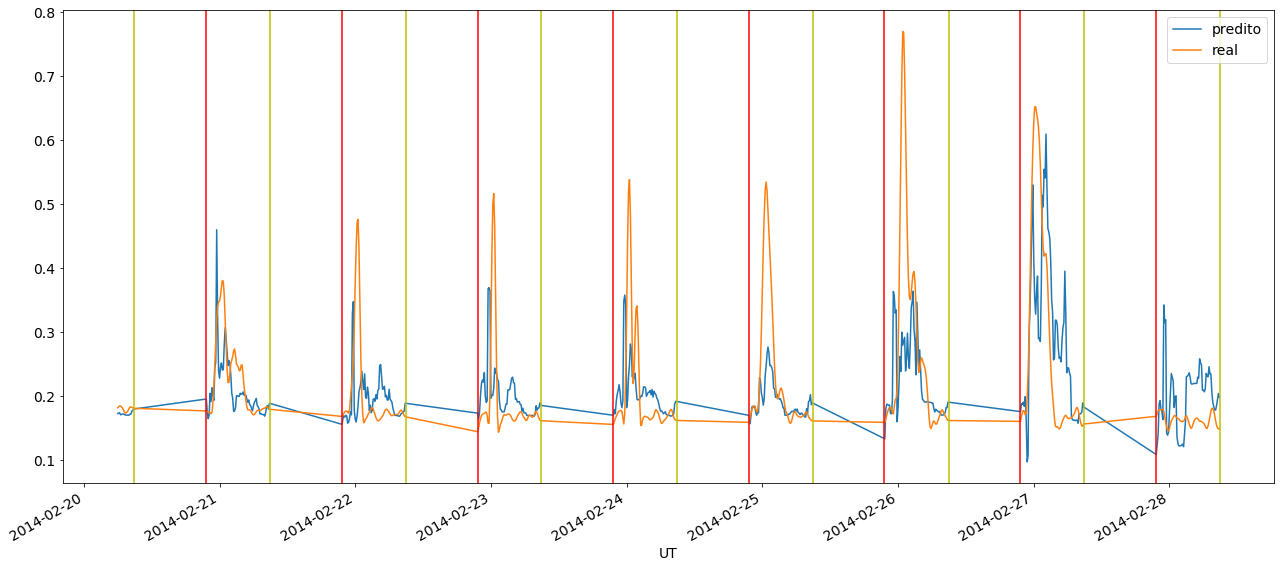


original - vtec
Error for the time series sample:
O erro quadrático médio foi: 0.009582
O erro quadrático total foi: 2.320530
O maior erro por previsão foi: 0.437974
O erro relativo foi: 28.562702%
O número de verdadeiros negativos foi: 213
O número de verdadeiros positivos foi: 114
O número de falsos negativos foi: 39
O número de falsos positivos foi: 196
O POD foi: 0.745098
O FAR foi: 0.632258
A ACC foi: 0.581851
O kappa foi: 0.097045
precission: 0.367742
recal: 0.745098
f1: 0.492441


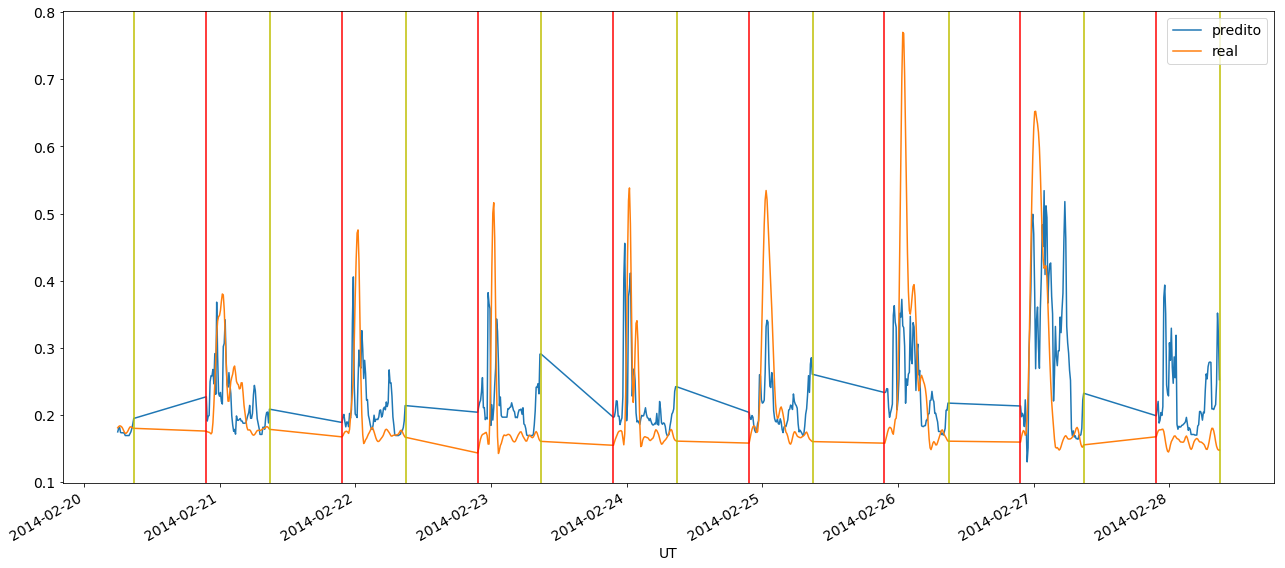


original - vtec_dt
Error for the time series sample:
O erro quadrático médio foi: 0.008748
O erro quadrático total foi: 2.217321
O maior erro por previsão foi: 0.473022
O erro relativo foi: 22.170880%
O número de verdadeiros negativos foi: 291
O número de verdadeiros positivos foi: 115
O número de falsos negativos foi: 38
O número de falsos positivos foi: 118
O POD foi: 0.751634
O FAR foi: 0.506438
A ACC foi: 0.722420
O kappa foi: 0.077975
precission: 0.493562
recal: 0.751634
f1: 0.595855


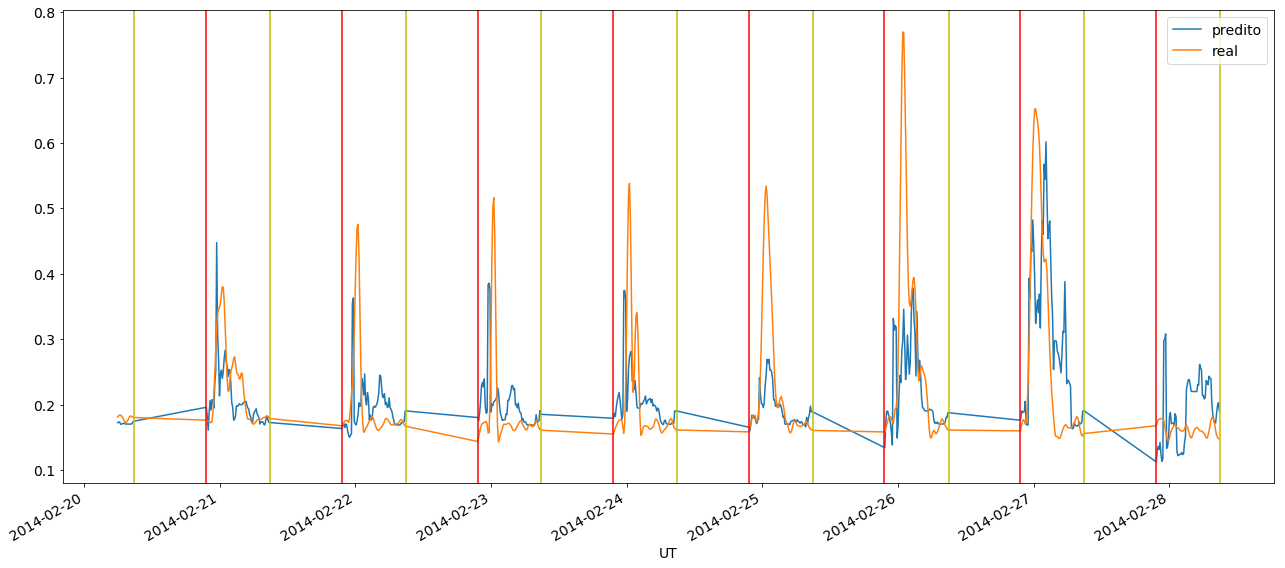


original - gvtec1
Error for the time series sample:
O erro quadrático médio foi: 0.008936
O erro quadrático total foi: 2.240997
O maior erro por previsão foi: 0.477658
O erro relativo foi: 22.292697%
O número de verdadeiros negativos foi: 265
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 144
O POD foi: 0.803922
O FAR foi: 0.539326
A ACC foi: 0.690391
O kappa foi: 0.081249
precission: 0.460674
recal: 0.803922
f1: 0.585714


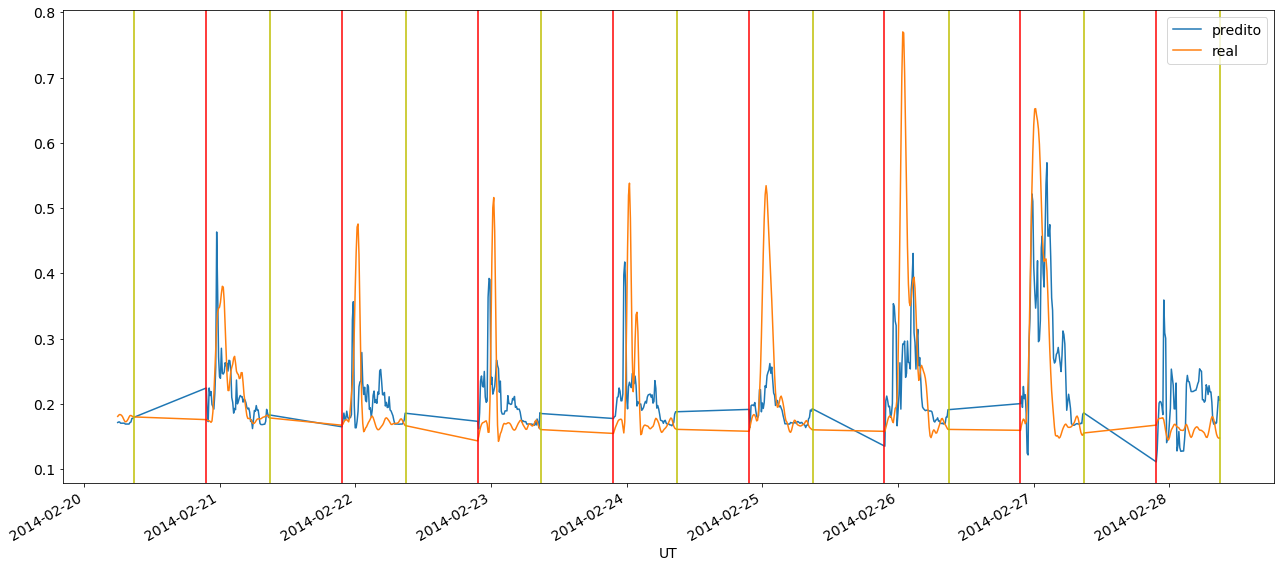


original - gvtec1_dt
Error for the time series sample:
O erro quadrático médio foi: 0.010071
O erro quadrático total foi: 2.379054
O maior erro por previsão foi: 0.549709
O erro relativo foi: 20.356596%
O número de verdadeiros negativos foi: 304
O número de verdadeiros positivos foi: 96
O número de falsos negativos foi: 57
O número de falsos positivos foi: 105
O POD foi: 0.627451
O FAR foi: 0.522388
A ACC foi: 0.711744
O kappa foi: 0.086777
precission: 0.477612
recal: 0.627451
f1: 0.542373


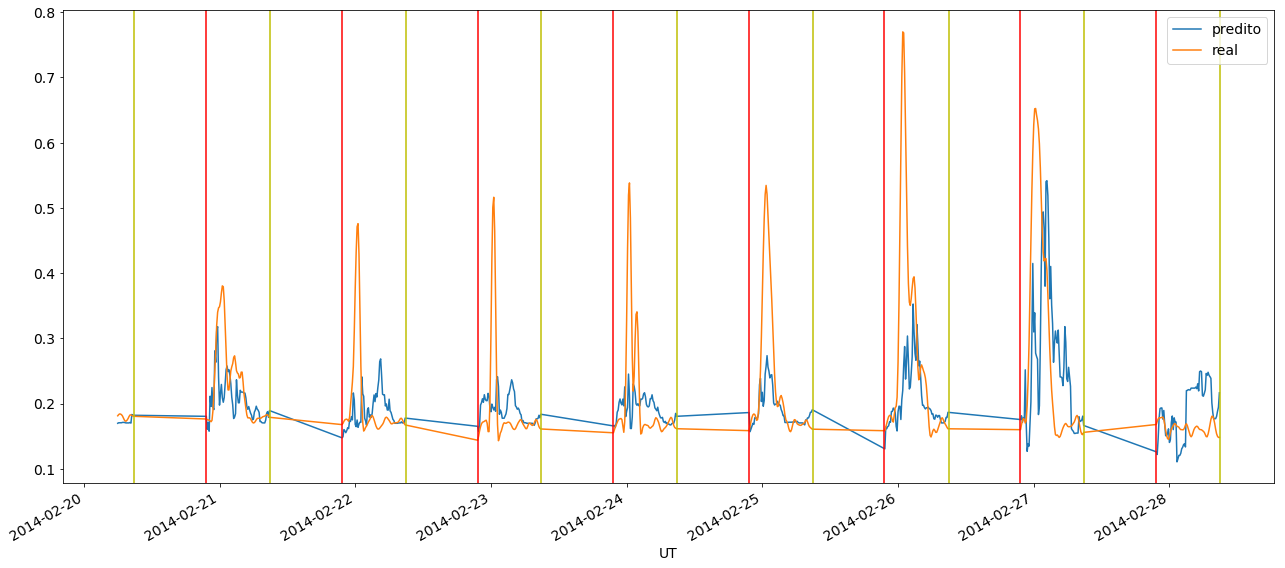


original - gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.010800
O erro quadrático total foi: 2.463637
O maior erro por previsão foi: 0.457479
O erro relativo foi: 29.685924%
O número de verdadeiros negativos foi: 208
O número de verdadeiros positivos foi: 131
O número de falsos negativos foi: 22
O número de falsos positivos foi: 201
O POD foi: 0.856209
O FAR foi: 0.605422
A ACC foi: 0.603203
O kappa foi: 0.097855
precission: 0.394578
recal: 0.856209
f1: 0.540206


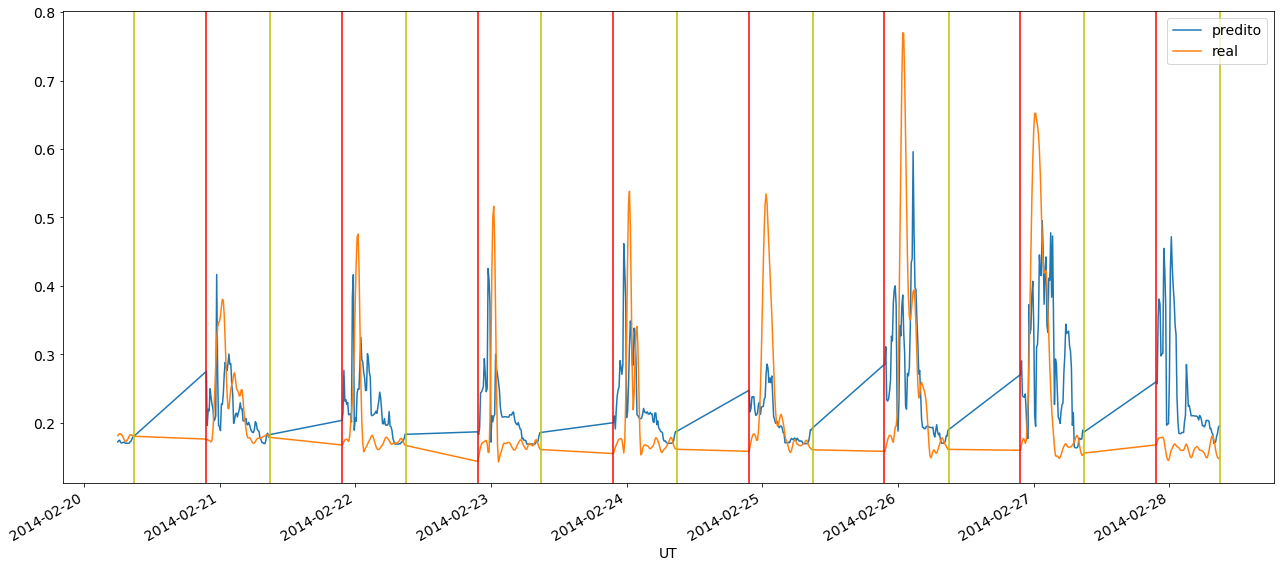


original - gvtec2_dt
Error for the time series sample:
O erro quadrático médio foi: 0.008796
O erro quadrático total foi: 2.223390
O maior erro por previsão foi: 0.476934
O erro relativo foi: 22.137906%
O número de verdadeiros negativos foi: 277
O número de verdadeiros positivos foi: 117
O número de falsos negativos foi: 36
O número de falsos positivos foi: 132
O POD foi: 0.764706
O FAR foi: 0.530120
A ACC foi: 0.701068
O kappa foi: 0.080470
precission: 0.469880
recal: 0.764706
f1: 0.582090


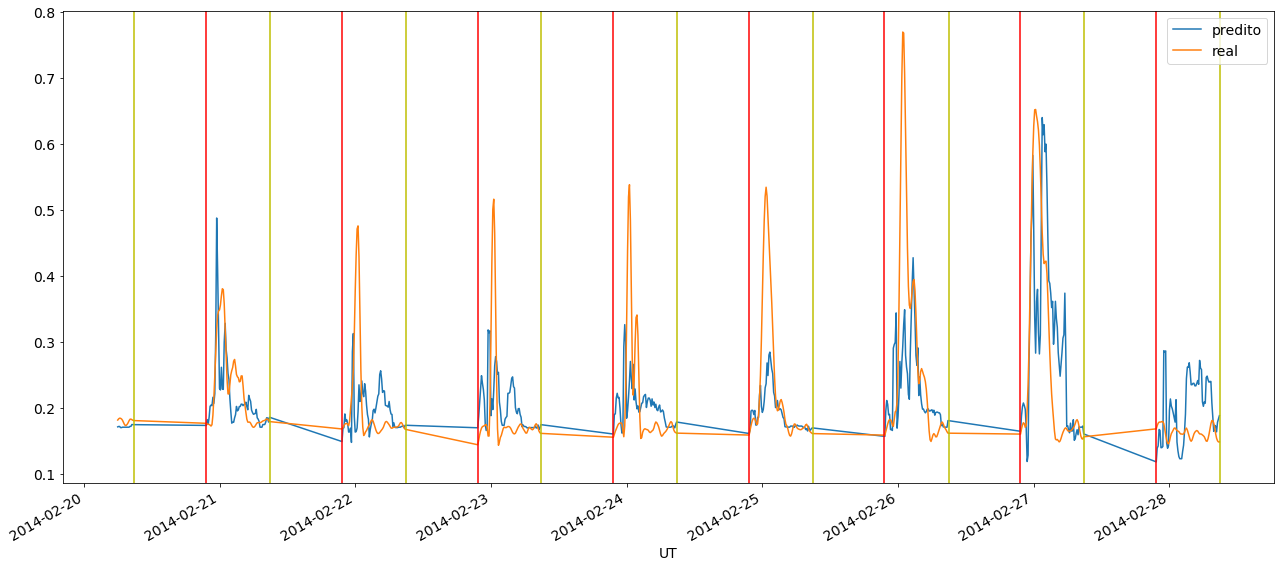


original + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.008912
O erro quadrático total foi: 2.238030
O maior erro por previsão foi: 0.486145
O erro relativo foi: 22.909900%
O número de verdadeiros negativos foi: 283
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 126
O POD foi: 0.830065
O FAR foi: 0.498024
A ACC foi: 0.729537
O kappa foi: 0.073961
precission: 0.501976
recal: 0.830065
f1: 0.625616


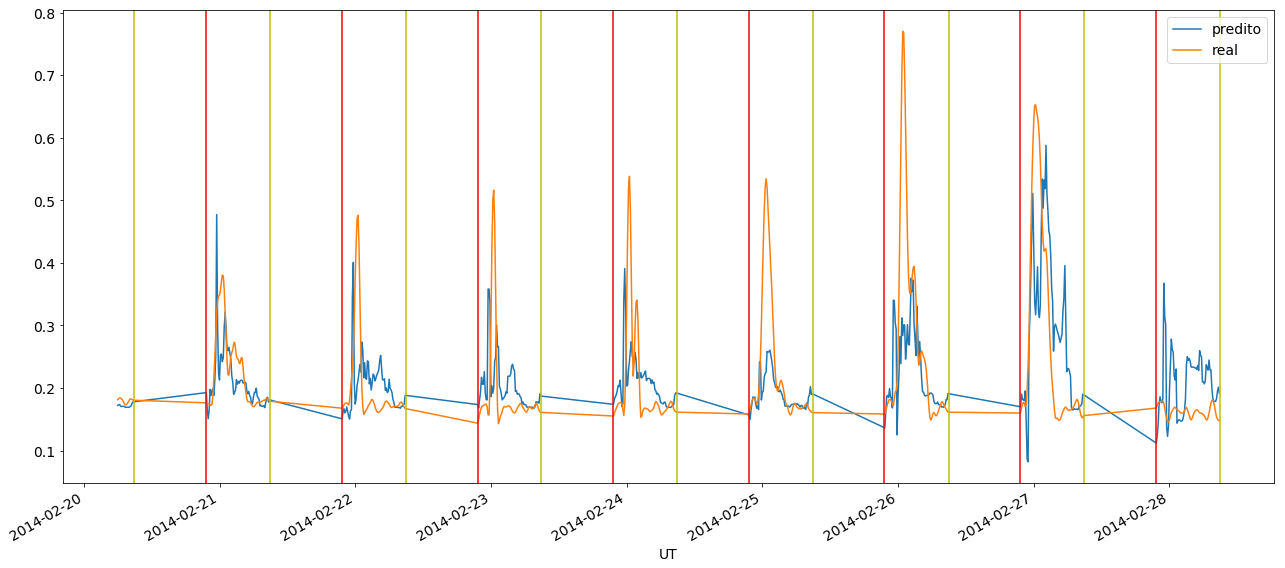


original + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.008134
O erro quadrático total foi: 2.138004
O maior erro por previsão foi: 0.490660
O erro relativo foi: 22.269917%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 131
O POD foi: 0.823529
O FAR foi: 0.509728
A ACC foi: 0.718861
O kappa foi: 0.076025
precission: 0.490272
recal: 0.823529
f1: 0.614634


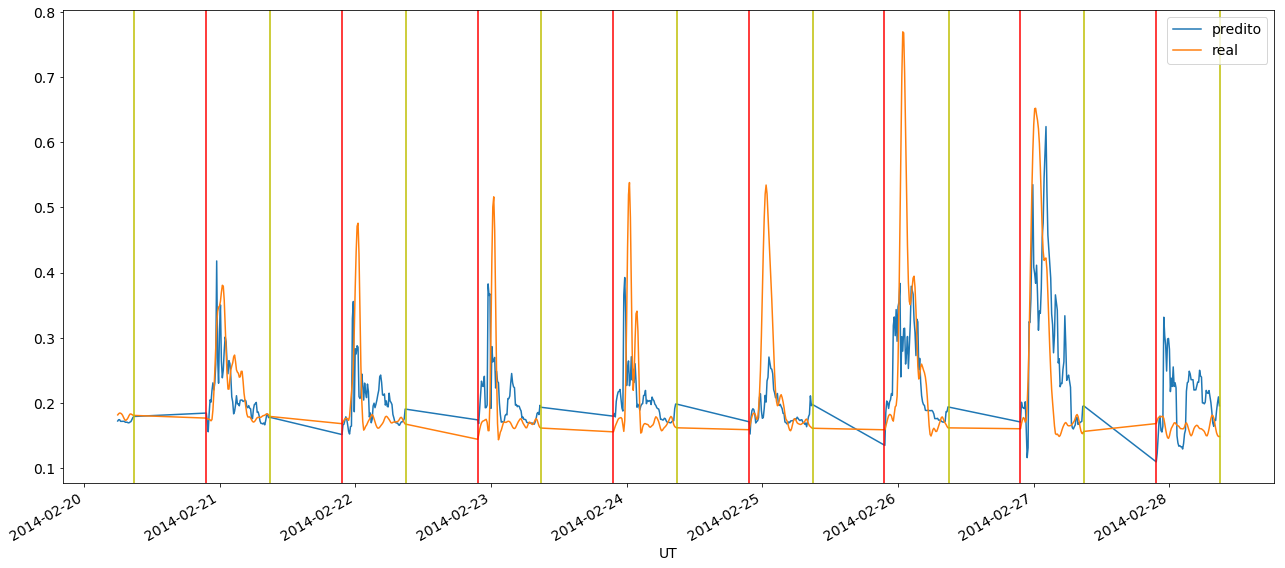


original + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.008988
O erro quadrático total foi: 2.247529
O maior erro por previsão foi: 0.467444
O erro relativo foi: 23.177471%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 118
O número de falsos negativos foi: 35
O número de falsos positivos foi: 131
O POD foi: 0.771242
O FAR foi: 0.526104
A ACC foi: 0.704626
O kappa foi: 0.079748
precission: 0.473896
recal: 0.771242
f1: 0.587065


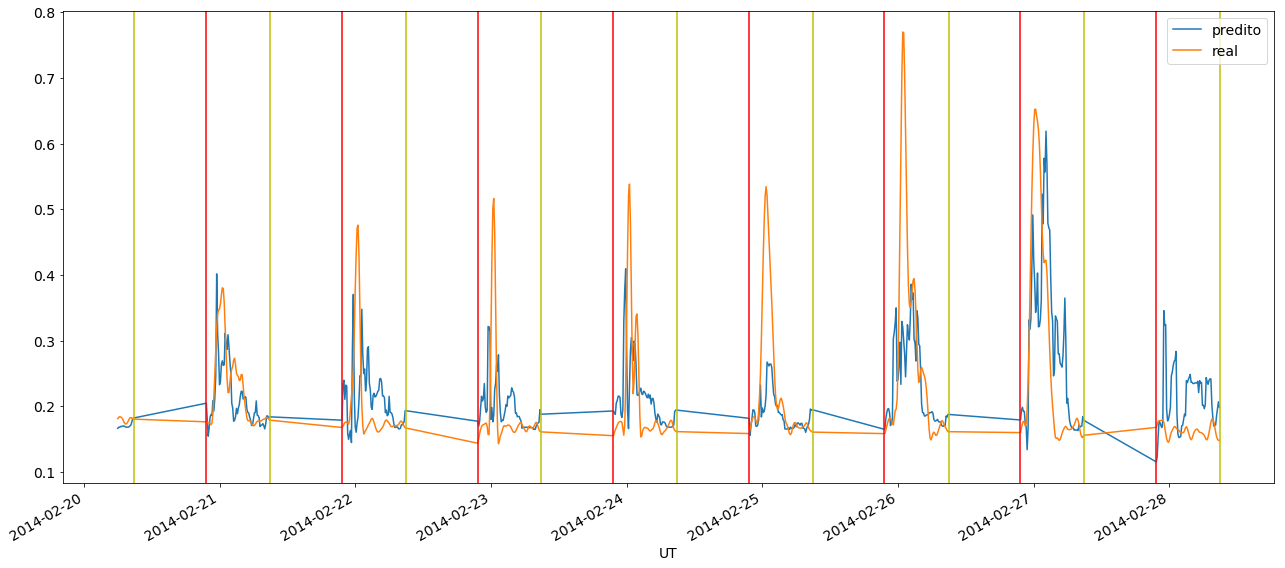


original + lag
Error for the time series sample:
O erro quadrático médio foi: 0.008266
O erro quadrático total foi: 2.155293
O maior erro por previsão foi: 0.497484
O erro relativo foi: 23.387544%
O número de verdadeiros negativos foi: 259
O número de verdadeiros positivos foi: 129
O número de falsos negativos foi: 24
O número de falsos positivos foi: 150
O POD foi: 0.843137
O FAR foi: 0.537634
A ACC foi: 0.690391
O kappa foi: 0.080945
precission: 0.462366
recal: 0.843137
f1: 0.597222


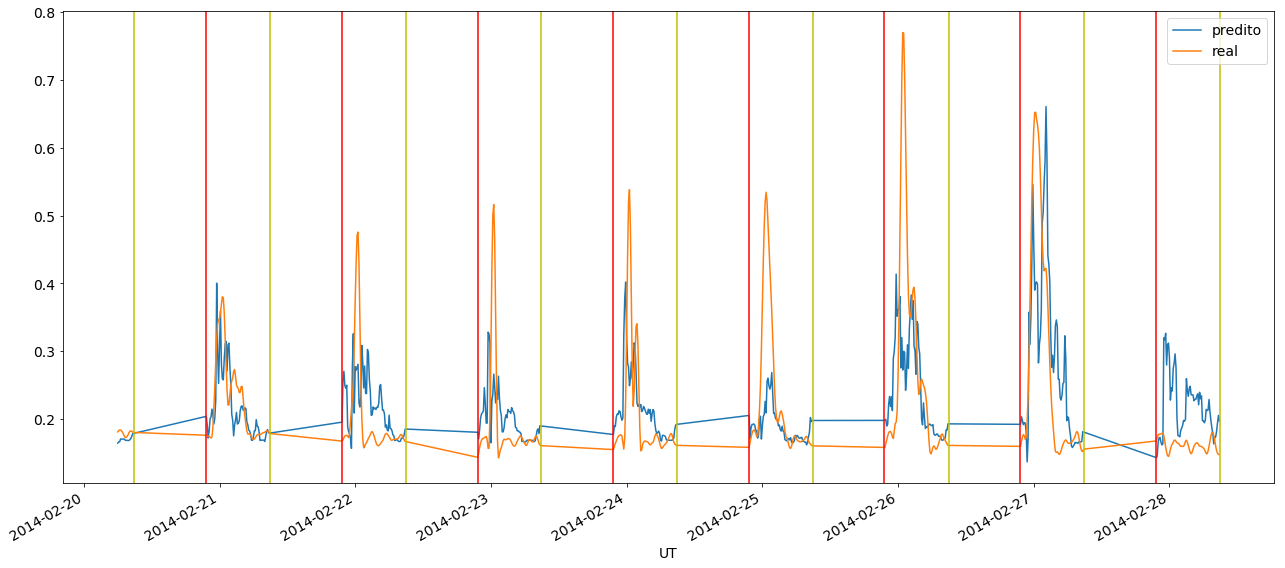


original + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.008360
O erro quadrático total foi: 2.167585
O maior erro por previsão foi: 0.459605
O erro relativo foi: 24.796332%
O número de verdadeiros negativos foi: 234
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 175
O POD foi: 0.862745
O FAR foi: 0.570033
A ACC foi: 0.651246
O kappa foi: 0.088696
precission: 0.429967
recal: 0.862745
f1: 0.573913


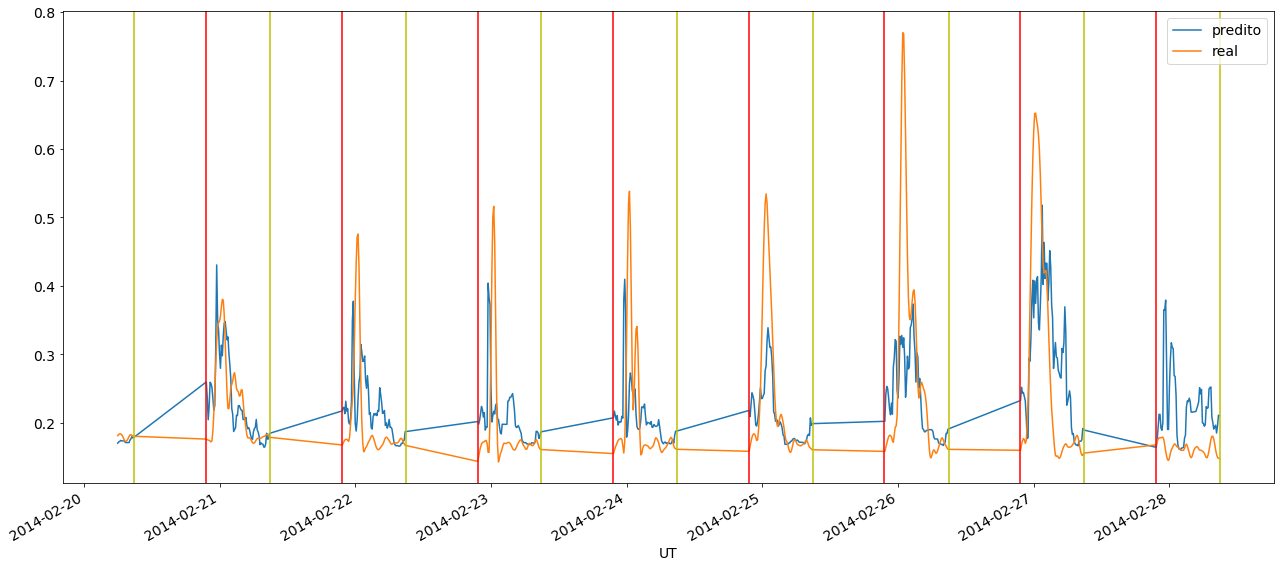


original + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008643
O erro quadrático total foi: 2.203938
O maior erro por previsão foi: 0.480423
O erro relativo foi: 22.653716%
O número de verdadeiros negativos foi: 259
O número de verdadeiros positivos foi: 119
O número de falsos negativos foi: 34
O número de falsos positivos foi: 150
O POD foi: 0.777778
O FAR foi: 0.557621
A ACC foi: 0.672598
O kappa foi: 0.084396
precission: 0.442379
recal: 0.777778
f1: 0.563981


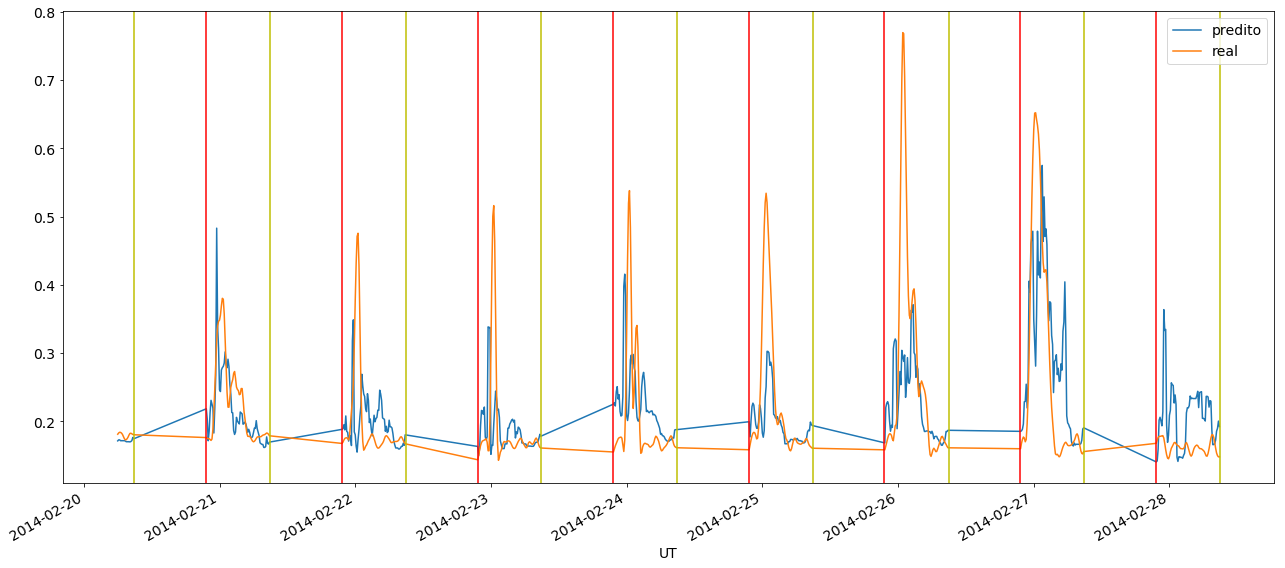


original + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.008295
O erro quadrático total foi: 2.159128
O maior erro por previsão foi: 0.486416
O erro relativo foi: 23.406759%
O número de verdadeiros negativos foi: 269
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 140
O POD foi: 0.862745
O FAR foi: 0.514706
A ACC foi: 0.713523
O kappa foi: 0.076395
precission: 0.485294
recal: 0.862745
f1: 0.621176


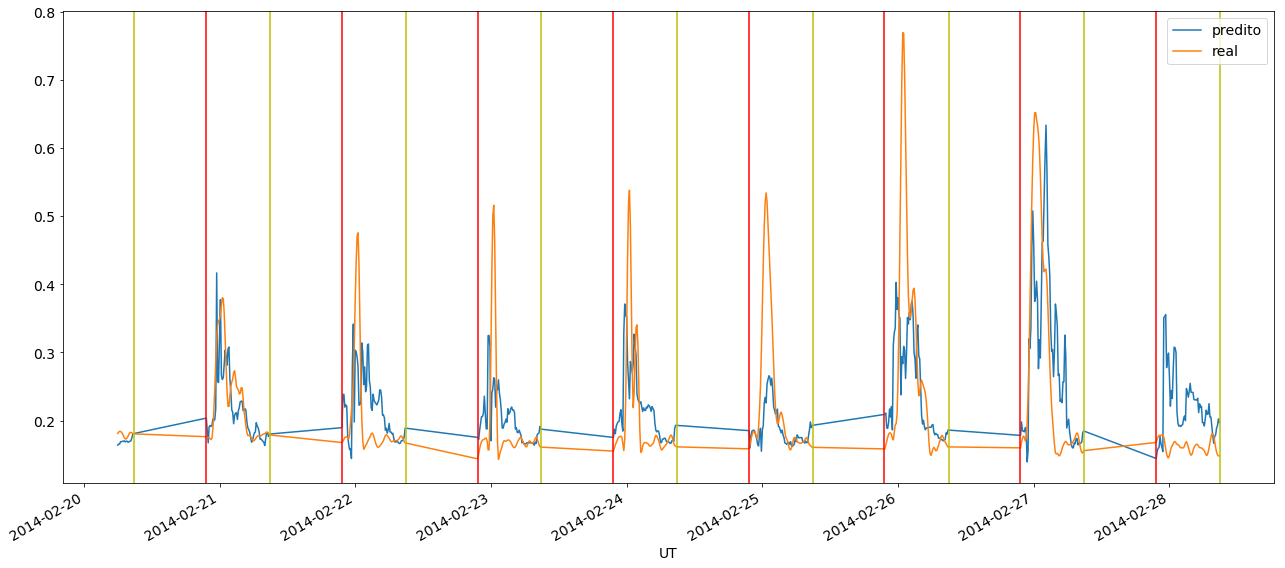


original + tempo + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008459
O erro quadrático total foi: 2.180296
O maior erro por previsão foi: 0.479188
O erro relativo foi: 23.158086%
O número de verdadeiros negativos foi: 260
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 149
O POD foi: 0.797386
O FAR foi: 0.549815
A ACC foi: 0.679715
O kappa foi: 0.083073
precission: 0.450185
recal: 0.797386
f1: 0.575472


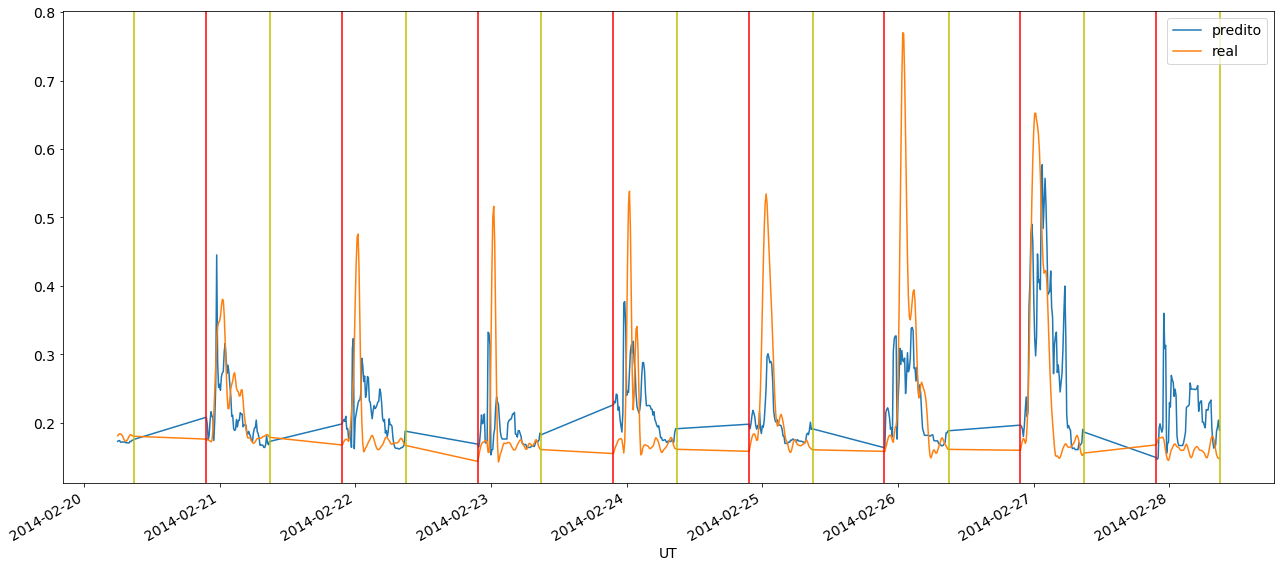


original + tempo + mdv2 + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007578
O erro quadrático total foi: 2.063670
O maior erro por previsão foi: 0.459839
O erro relativo foi: 23.253384%
O número de verdadeiros negativos foi: 239
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 170
O POD foi: 0.862745
O FAR foi: 0.562914
A ACC foi: 0.660142
O kappa foi: 0.086938
precission: 0.437086
recal: 0.862745
f1: 0.580220


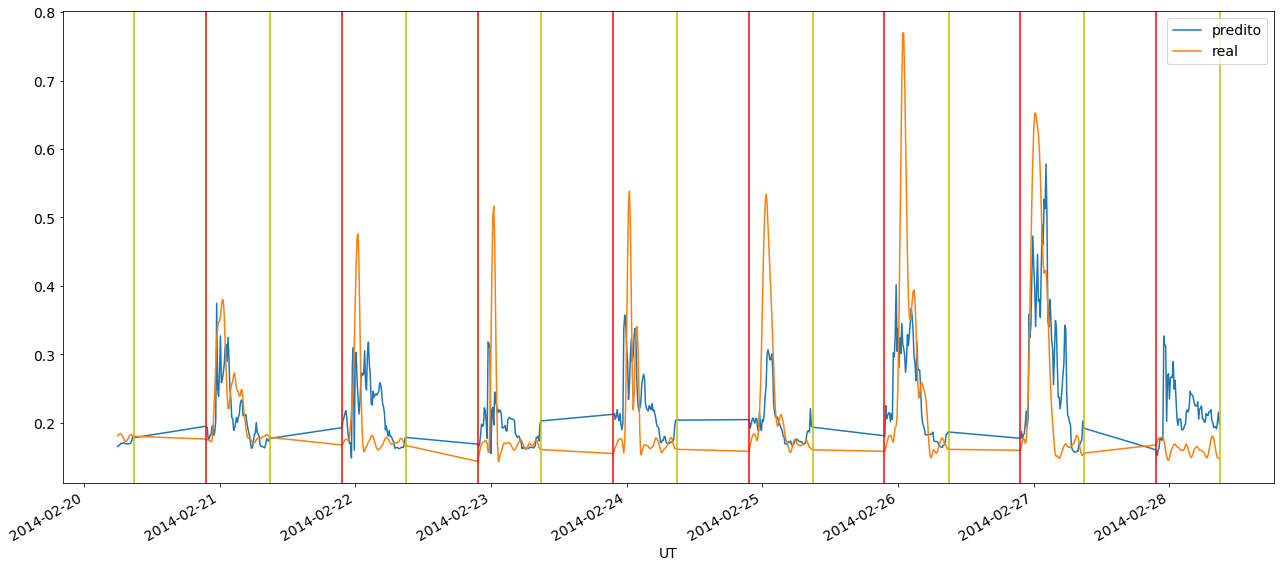


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.007697
O erro quadrático total foi: 2.079768
O maior erro por previsão foi: 0.438570
O erro relativo foi: 25.918854%
O número de verdadeiros negativos foi: 225
O número de verdadeiros positivos foi: 138
O número de falsos negativos foi: 15
O número de falsos positivos foi: 184
O POD foi: 0.901961
O FAR foi: 0.571429
A ACC foi: 0.645907
O kappa foi: 0.091080
precission: 0.428571
recal: 0.901961
f1: 0.581053


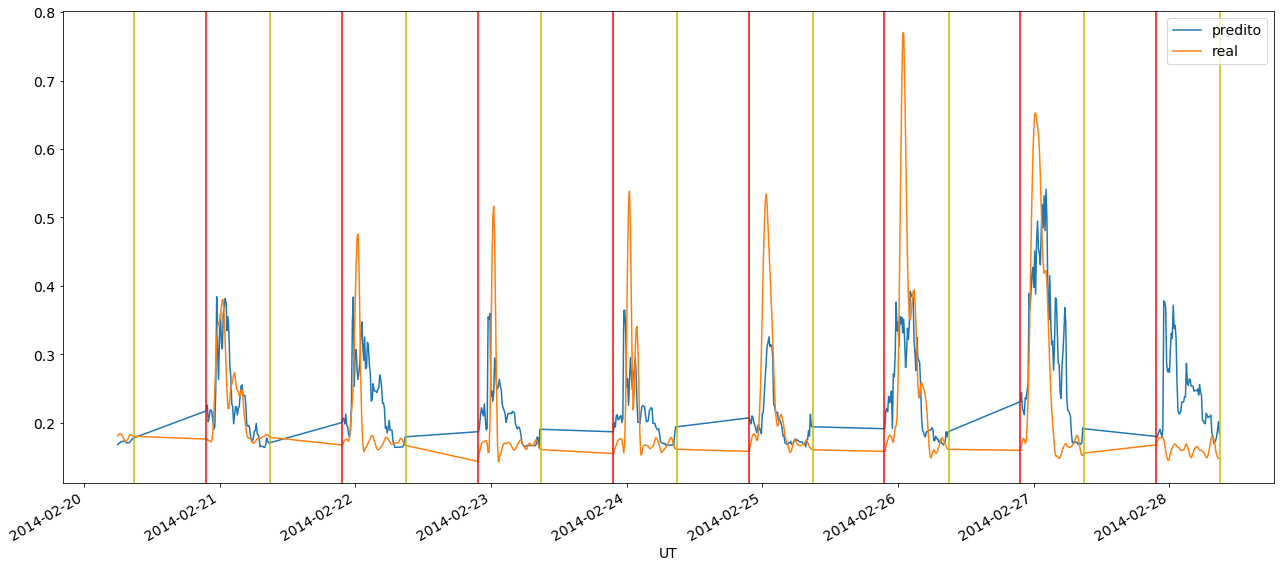


vtec
Error for the time series sample:
O erro quadrático médio foi: 0.010459
O erro quadrático total foi: 2.424412
O maior erro por previsão foi: 0.535922
O erro relativo foi: 24.713934%
O número de verdadeiros negativos foi: 207
O número de verdadeiros positivos foi: 141
O número de falsos negativos foi: 12
O número de falsos positivos foi: 202
O POD foi: 0.921569
O FAR foi: 0.588921
A ACC foi: 0.619217
O kappa foi: 0.098042
precission: 0.411079
recal: 0.921569
f1: 0.568548


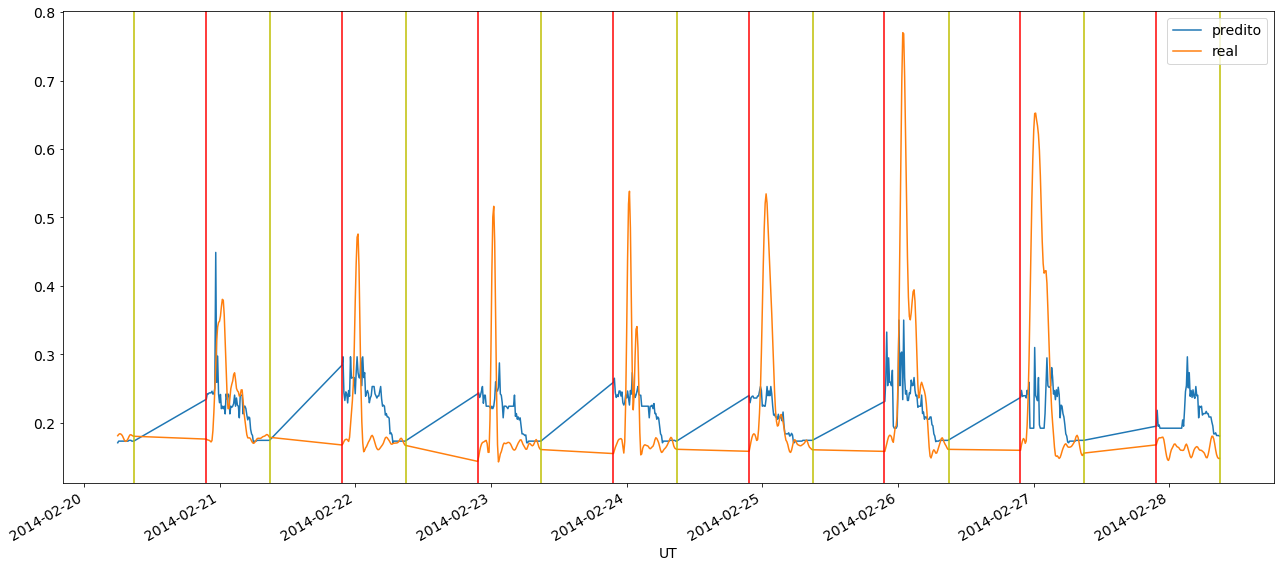


vtec + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.009637
O erro quadrático total foi: 2.327177
O maior erro por previsão foi: 0.478242
O erro relativo foi: 28.189720%
O número de verdadeiros negativos foi: 176
O número de verdadeiros positivos foi: 152
O número de falsos negativos foi: 1
O número de falsos positivos foi: 233
O POD foi: 0.993464
O FAR foi: 0.605195
A ACC foi: 0.583630
O kappa foi: 0.112689
precission: 0.394805
recal: 0.993464
f1: 0.565056


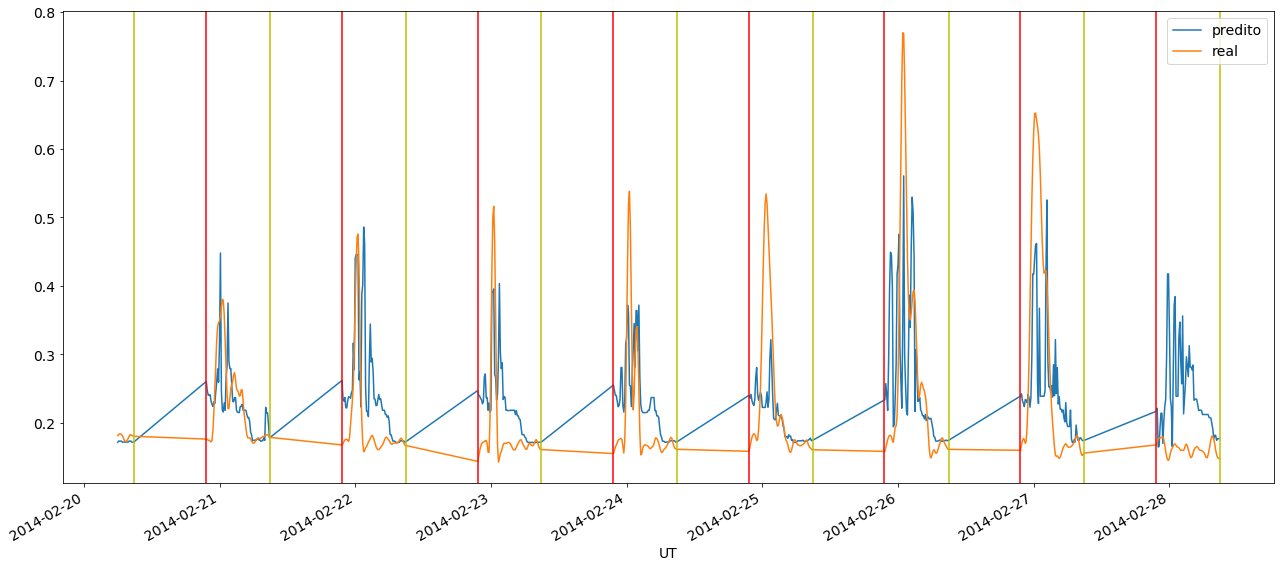


vtec + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.007313
O erro quadrático total foi: 2.027233
O maior erro por previsão foi: 0.451002
O erro relativo foi: 21.783385%
O número de verdadeiros negativos foi: 271
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 138
O POD foi: 0.849673
O FAR foi: 0.514925
A ACC foi: 0.713523
O kappa foi: 0.076535
precission: 0.485075
recal: 0.849673
f1: 0.617577


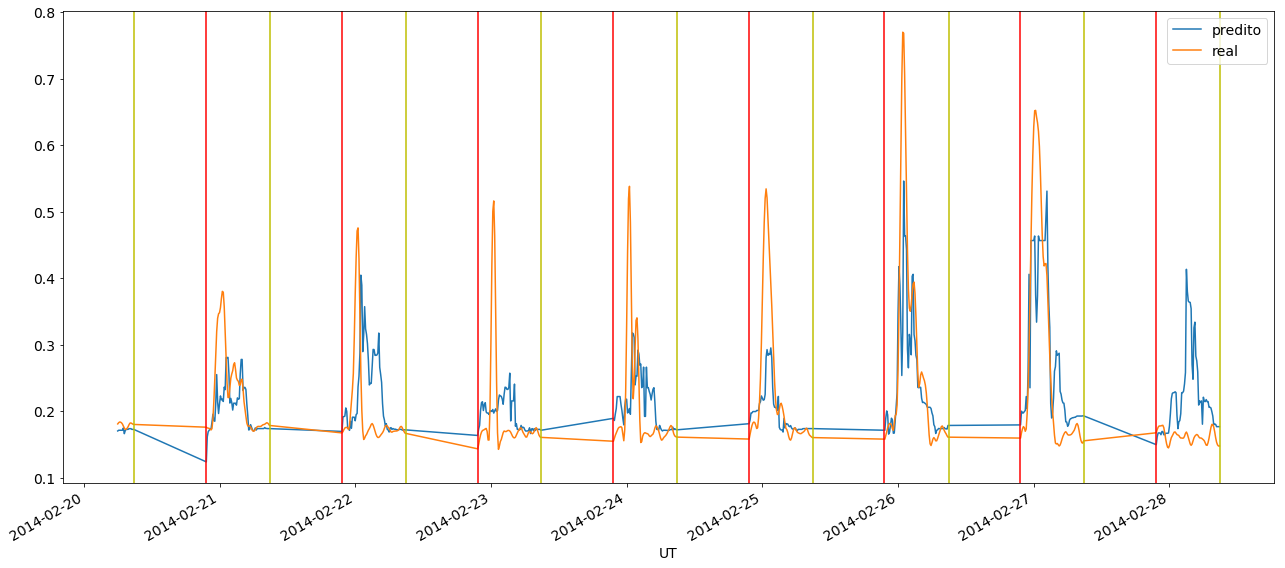


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
O erro quadrático médio foi: 0.009585
O erro quadrático total foi: 2.320937
O maior erro por previsão foi: 0.494110
O erro relativo foi: 26.372528%
O número de verdadeiros negativos foi: 202
O número de verdadeiros positivos foi: 144
O número de falsos negativos foi: 9
O número de falsos positivos foi: 207
O POD foi: 0.941176
O FAR foi: 0.589744
A ACC foi: 0.615658
O kappa foi: 0.100132
precission: 0.410256
recal: 0.941176
f1: 0.571429


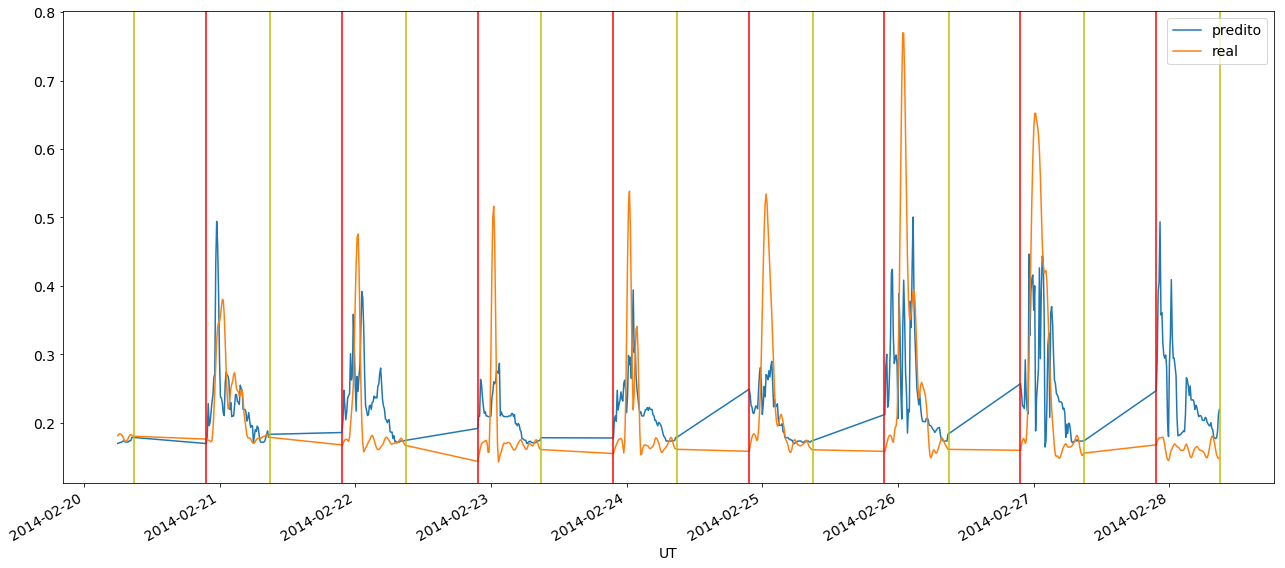


vtec + gvtec1 + gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.011289
O erro quadrático total foi: 2.518836
O maior erro por previsão foi: 0.579513
O erro relativo foi: 21.807826%
O número de verdadeiros negativos foi: 308
O número de verdadeiros positivos foi: 98
O número de falsos negativos foi: 55
O número de falsos positivos foi: 101
O POD foi: 0.640523
O FAR foi: 0.507538
A ACC foi: 0.722420
O kappa foi: 0.084972
precission: 0.492462
recal: 0.640523
f1: 0.556818


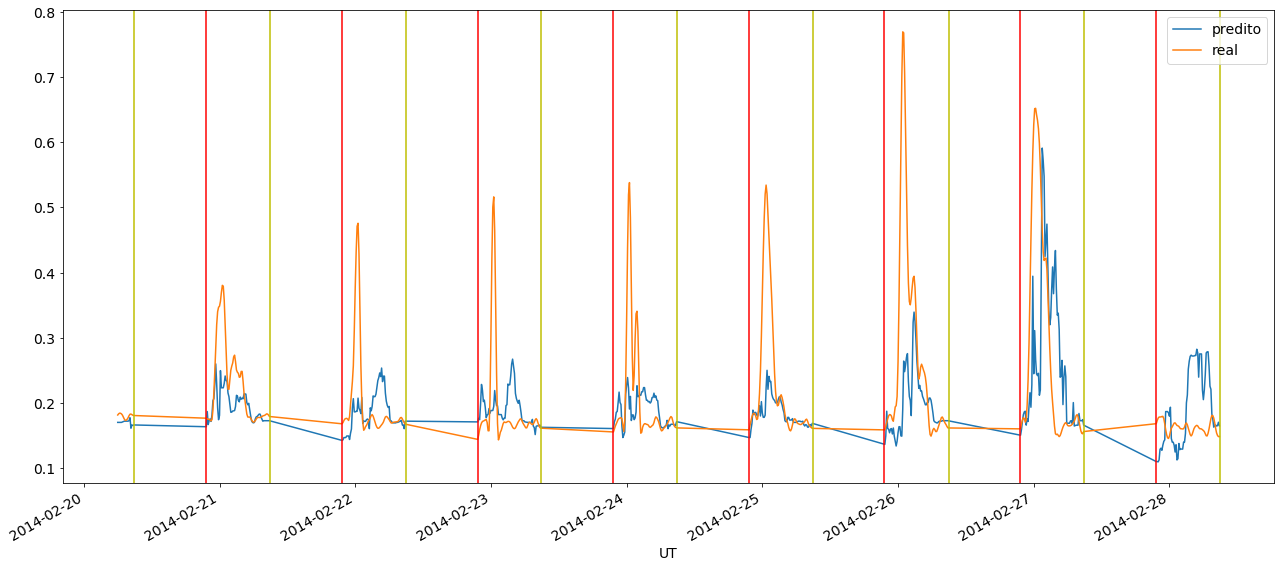


vtec + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.009235
O erro quadrático total foi: 2.278221
O maior erro por previsão foi: 0.473407
O erro relativo foi: 25.644370%
O número de verdadeiros negativos foi: 191
O número de verdadeiros positivos foi: 148
O número de falsos negativos foi: 5
O número de falsos positivos foi: 218
O POD foi: 0.967320
O FAR foi: 0.595628
A ACC foi: 0.603203
O kappa foi: 0.105175
precission: 0.404372
recal: 0.967320
f1: 0.570328


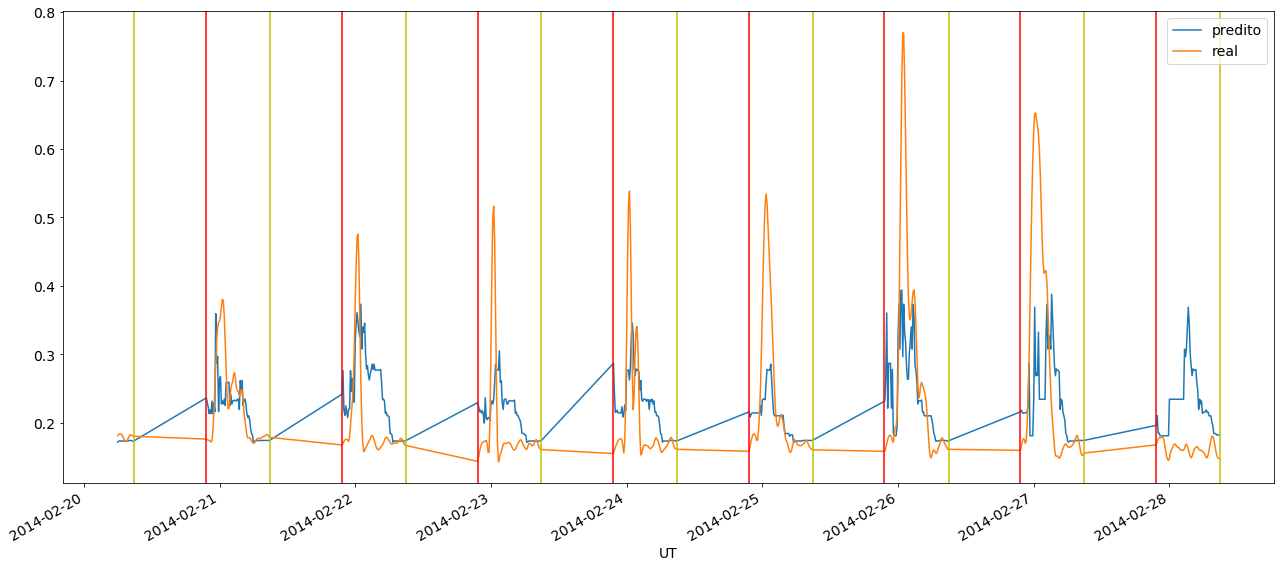


vtec + tempo + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.010417
O erro quadrático total foi: 2.419530
O maior erro por previsão foi: 0.393587
O erro relativo foi: 31.371204%
O número de verdadeiros negativos foi: 187
O número de verdadeiros positivos foi: 147
O número de falsos negativos foi: 6
O número de falsos positivos foi: 222
O POD foi: 0.960784
O FAR foi: 0.601626
A ACC foi: 0.594306
O kappa foi: 0.106876
precission: 0.398374
recal: 0.960784
f1: 0.563218


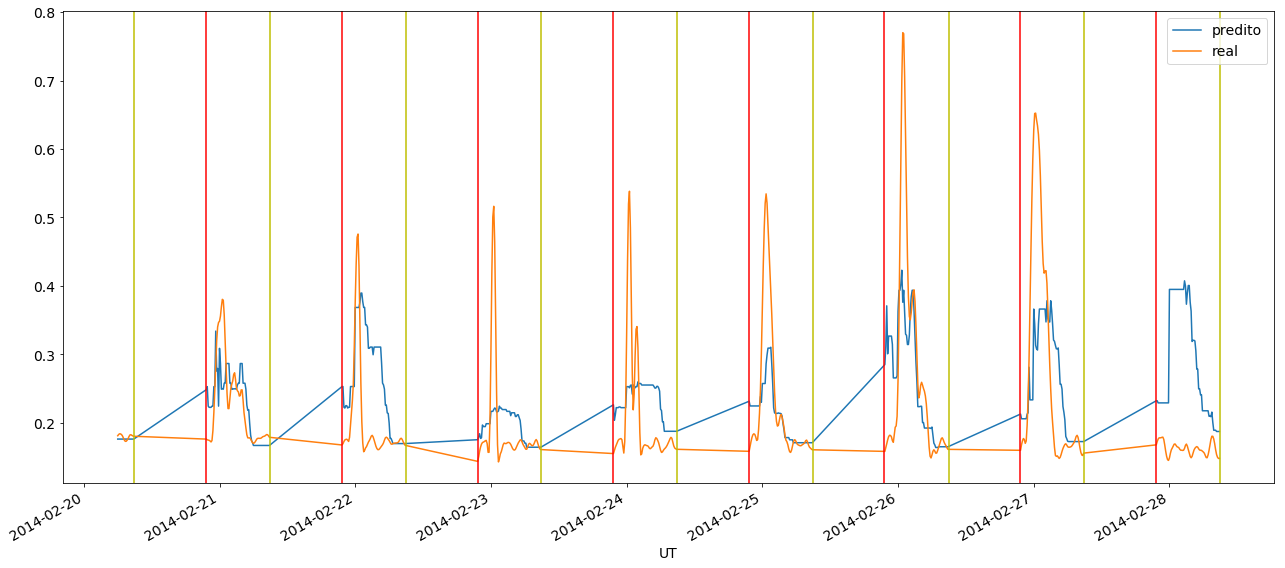


vtec + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007103
O erro quadrático total foi: 1.997988
O maior erro por previsão foi: 0.444596
O erro relativo foi: 22.908731%
O número de verdadeiros negativos foi: 267
O número de verdadeiros positivos foi: 138
O número de falsos negativos foi: 15
O número de falsos positivos foi: 142
O POD foi: 0.901961
O FAR foi: 0.507143
A ACC foi: 0.720641
O kappa foi: 0.074724
precission: 0.492857
recal: 0.901961
f1: 0.637413


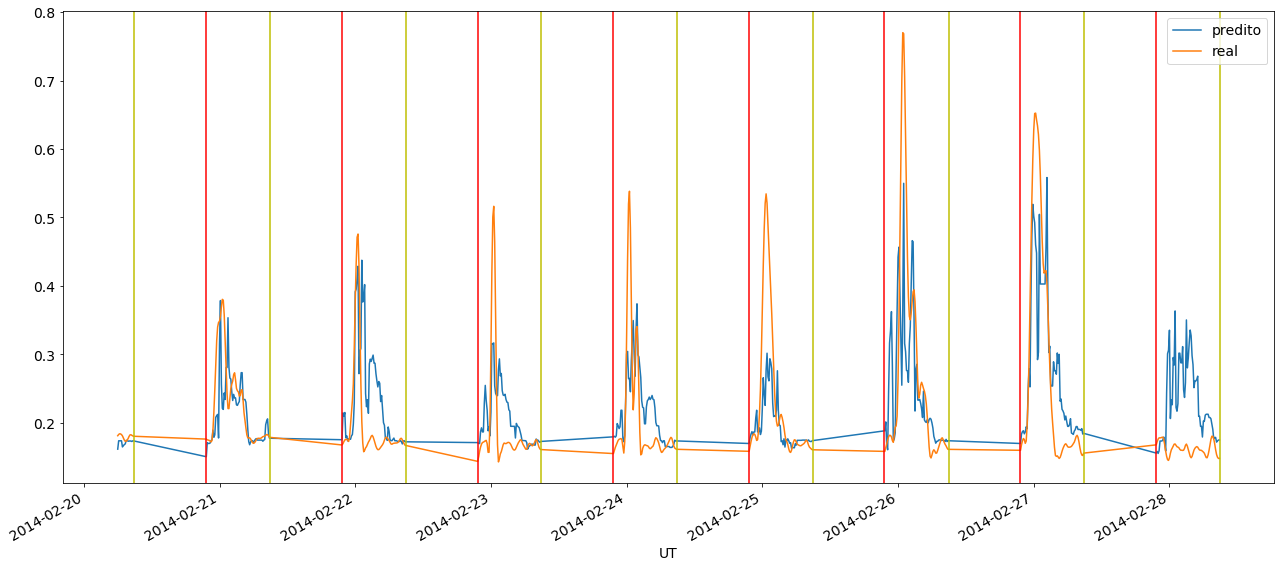


vtec + tempo + lag + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.007911
O erro quadrático total foi: 2.108500
O maior erro por previsão foi: 0.397562
O erro relativo foi: 27.367288%
O número de verdadeiros negativos foi: 243
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 166
O POD foi: 0.888889
O FAR foi: 0.549669
A ACC foi: 0.674377
O kappa foi: 0.084558
precission: 0.450331
recal: 0.888889
f1: 0.597802


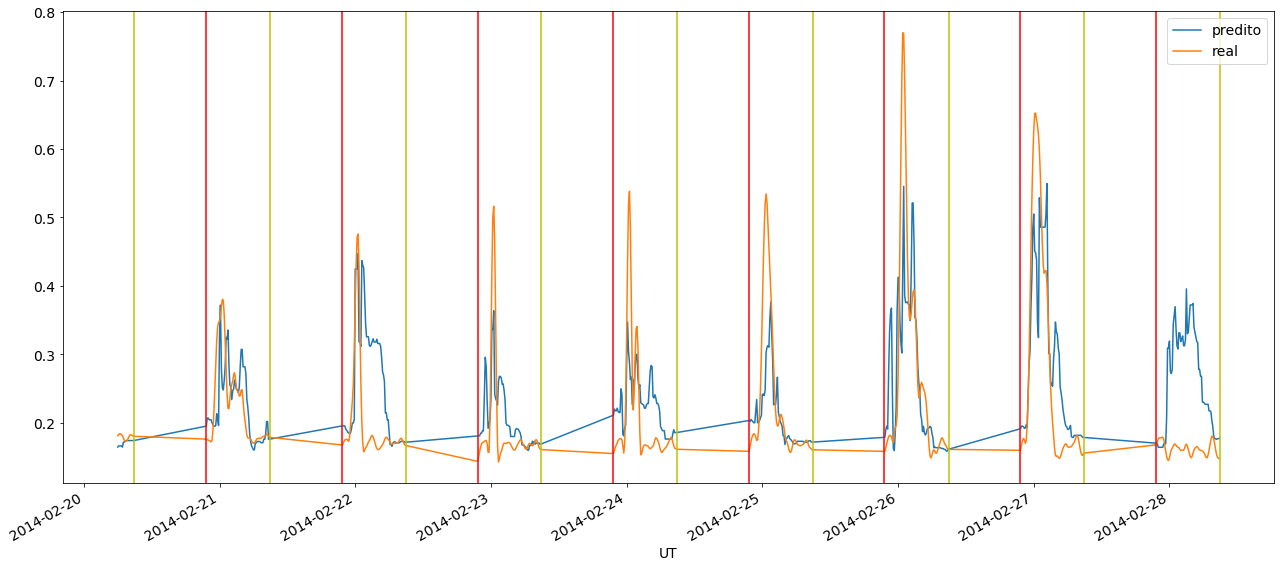


vtec + tempo + lag + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008087
O erro quadrático total foi: 2.131906
O maior erro por previsão foi: 0.431823
O erro relativo foi: 24.364384%
O número de verdadeiros negativos foi: 257
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 152
O POD foi: 0.830065
O FAR foi: 0.544803
A ACC foi: 0.683274
O kappa foi: 0.082275
precission: 0.455197
recal: 0.830065
f1: 0.587963


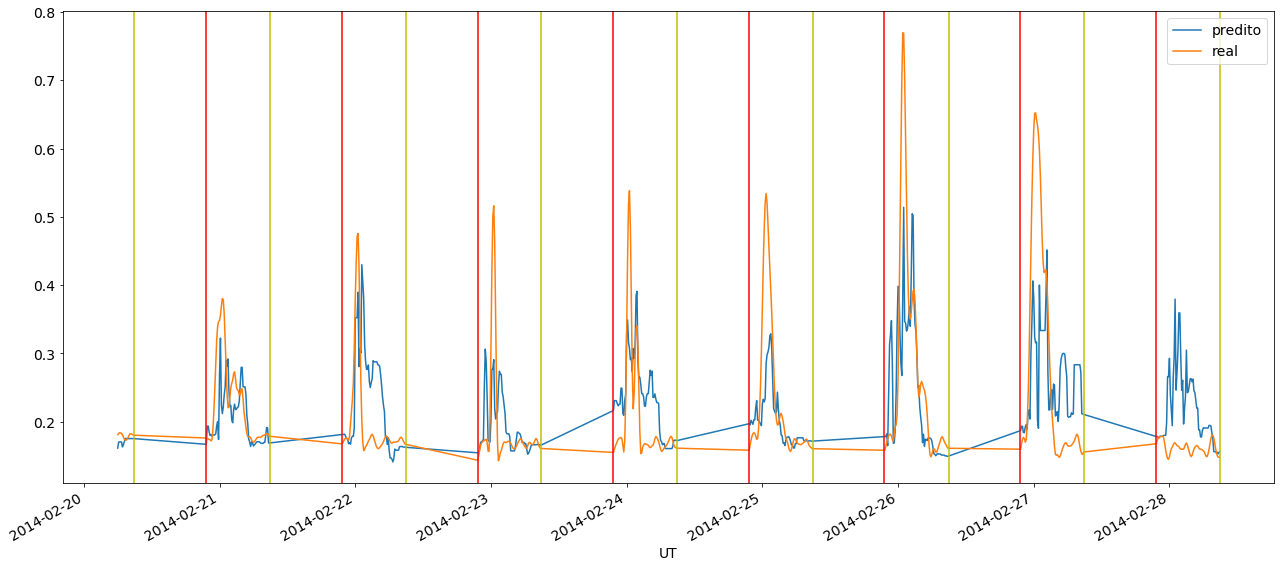


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008214
O erro quadrático total foi: 2.148489
O maior erro por previsão foi: 0.414348
O erro relativo foi: 27.438318%
O número de verdadeiros negativos foi: 234
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 175
O POD foi: 0.862745
O FAR foi: 0.570033
A ACC foi: 0.651246
O kappa foi: 0.088696
precission: 0.429967
recal: 0.862745
f1: 0.573913


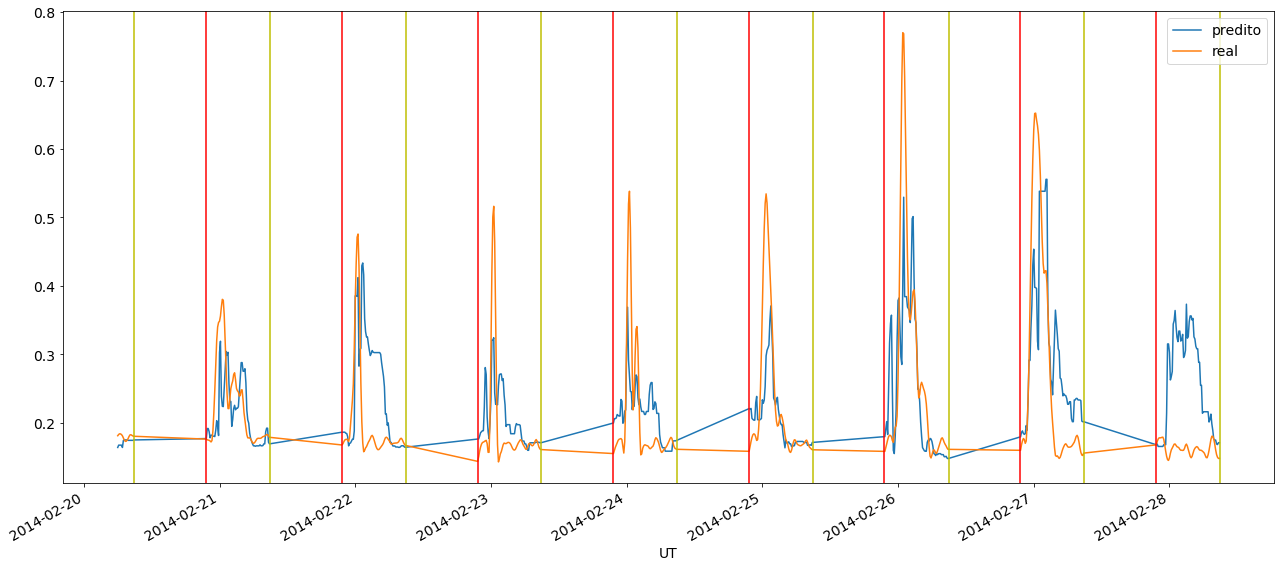

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(model=XGBRegressor,
                                             df=df,
                                             instances_set=list(i.set),
                                             target='s4',
                                             save=True,
                                             file_to_save_model='./images/09_analise_all_xgboost/' + i.name + '.eps ')
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,114,292,117,39,22.2108,0.7451,0.5065,0.7224,0.4935,0.7451,0.5938,0.0783,0.4907,2.2582,0.0091
original - vtec,114,213,196,39,28.5627,0.7451,0.6323,0.5819,0.3677,0.7451,0.4924,0.0970,0.4380,2.3205,0.0096
original - vtec_dt,115,291,118,38,22.1709,0.7516,0.5064,0.7224,0.4936,0.7516,0.5959,0.0780,0.4730,2.2173,0.0087
original - gvtec1,123,265,144,30,22.2927,0.8039,0.5393,0.6904,0.4607,0.8039,0.5857,0.0812,0.4777,2.2410,0.0089
original - gvtec1_dt,96,304,105,57,20.3566,0.6275,0.5224,0.7117,0.4776,0.6275,0.5424,0.0868,0.5497,2.3791,0.0101
original - gvtec2,131,208,201,22,29.6859,0.8562,0.6054,0.6032,0.3946,0.8562,0.5402,0.0979,0.4575,2.4636,0.0108
original - gvtec2_dt,117,277,132,36,22.1379,0.7647,0.5301,0.7011,0.4699,0.7647,0.5821,0.0805,0.4769,2.2234,0.0088
original + tempo,127,283,126,26,22.9099,0.8301,0.4980,0.7295,0.5020,0.8301,0.6256,0.0740,0.4861,2.2380,0.0089
original + gvtec1_dt_lag_9,126,278,131,27,22.2699,0.8235,0.5097,0.7189,0.4903,0.8235,0.6146,0.0760,0.4907,2.1380,0.0081
